# Exercise 1.10

- Run a simulation for flipping 1000 fair coins

- Flip each coin independently 10x

- Take 3 coins as follows:
  - $c_1$ is the first flipped
  - $c_{rand}$ is chosen at random
  - $c_{min}$ is the earliest one with the minimum frequency of heads
  
- $\nu_1$, $\nu_{rand}$, $\nu_{min}$ are the fraction of heads obtained for each coin. 

### Find $\mu$ for each coin
$\mu$ should be the out of sample error: 

$E_{out}(h) = P[h(x) \neq f(\mathbf{x})]$


In [79]:
from scipy.stats import binom
import numpy as np
import pandas as pd

N = 20

def run(*args, **kwargs):
    flipN = binom(n=N, p=0.5)
    results = flipN.rvs(1000)

    c1 = results[0]
    rand = np.random.randint(1000)
    crand = results[rand]
    minint = np.argmin(results)
    cmin = results[minint]
    # actually we do not care about the RVs, only the result
    return pd.Series(dict(
        c1=c1/N,
        crand=crand/N,
        cmin=cmin/N,
    ))

In [80]:
res = run()

# the mu for each will be value - 0.5
print(res)

c1       0.45
crand    0.55
cmin     0.15
dtype: float64


In [81]:
from multiprocessing import Pool


with Pool(8) as p:
    res = {
        idx: result 
        for idx, result in enumerate(p.map(run, range(100000)))
    }
    
res = pd.DataFrame(res).T

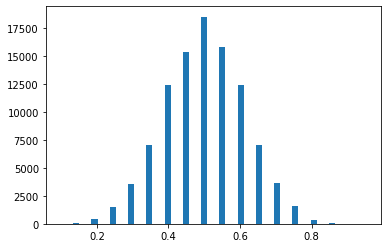

In [82]:
plt.hist(res['c1'], bins=50);


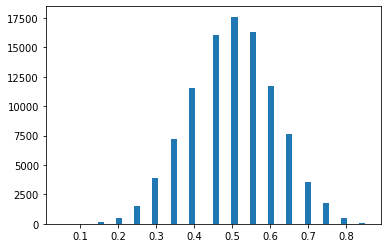

In [83]:
plt.hist(res['crand'], bins=50);

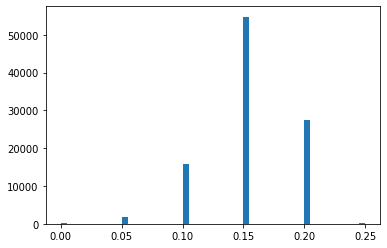

In [84]:
plt.hist(res['cmin'], bins=50);

Plot $P[|\nu - \mu| > \epsilon]$ as a function of $\epsilon$ along with the Hoeffding bound $2e^{-2\epsilon^2N}$


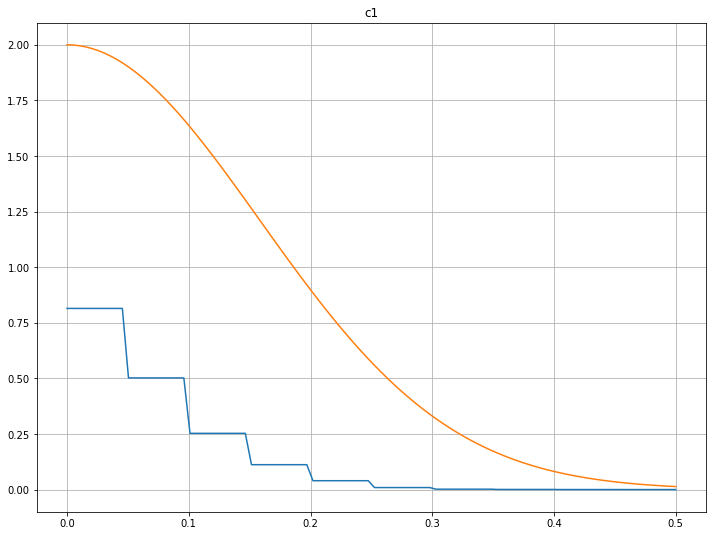

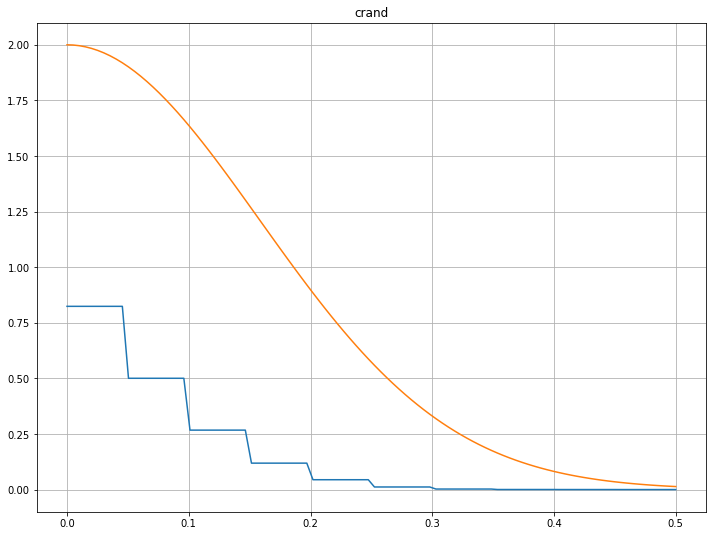

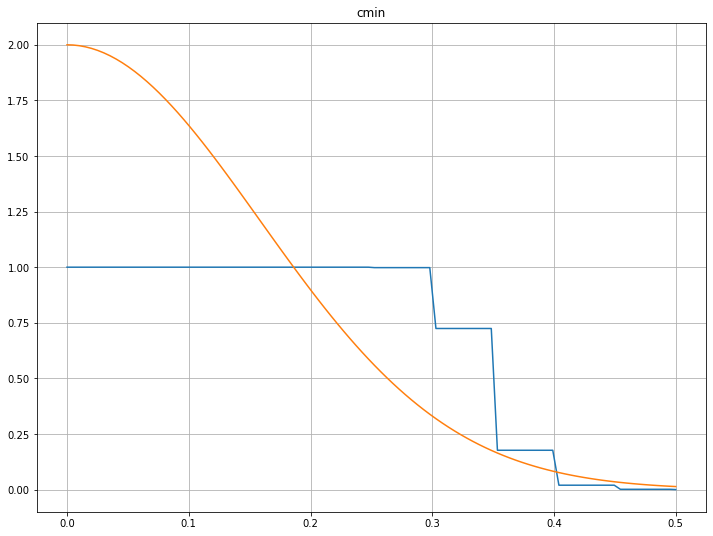

In [85]:
epsilons = np.linspace(0.0, 0.5, num=100)

def estimate_hoeff(nu, eps):
    # we do not know nu, but we have samples of nu,
    # so use this to estimate  P(|v-u| > e) by counting. 
    bound = np.abs(nu - 0.5)
    estimate = bound[:, None] > eps[None, :]
    estimate = estimate.sum(axis=0) / bound.size
    return estimate

def hoeff_bound(eps):
    return 2 * np.exp(-2 * eps**2 * 10)

hoeff = hoeff_bound(epsilons)

out = {}

for title, nu in [('c1', res['c1']), ('crand', res['crand']), ('cmin', res['cmin'])]:
    plt.figure(figsize=(12, 9))
    plt.grid()
    est = estimate_hoeff(nu, epsilons)
    plt.plot(epsilons, est)
    plt.plot(epsilons, hoeff)
    plt.title(title)


As we expected, $c_1$ and $c_{rand}$ do obey the Hoeffnung bound. $c_{min}$ does not, because the data was generated after the hypothesis was formulated. The data was generated and then $c_{min}$ was chosen as a hypothesis from that generated data. 

Try plotting the altered Hoeffding-

$P[|E_{in}(g) - E_{out}(g)| > \epsilon] \leq 2Me^{-2\epsilon^2}N, M=3$

Text(0.5, 1.0, 'Altered Hoeffding for $c_{min}$')

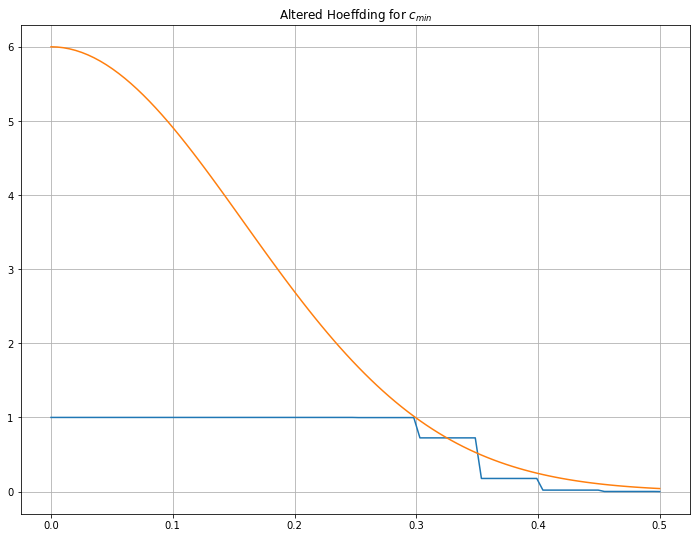

In [86]:
def hoeff_bound2(eps, M):
    return 2 * M * np.exp(-2 * eps**2 * 10)

hoeff2 = hoeff_bound2(epsilons, M=3)

plt.figure(figsize=(12, 9))
plt.grid()
est = estimate_hoeff(res['cmin'], epsilons)
plt.plot(epsilons, est)
plt.plot(epsilons, hoeff2)
plt.title('Altered Hoeffding for $c_{min}$')